## Vendas


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Básico

Leia o arquivo vendas.csv em um DataFrame.

In [48]:
vendas = pd.read_csv('vendas.csv.txt')

Mostre as 5 primeiras linhas.

In [49]:
vendas.head()

,id_venda,data,produto,unidade,preco_unitario,quantidade,vendedor
0,1,2025-07-01,Camiseta,un,49.9,2,Joana
1,2,2025-07-01,Calça,un,89.9,1,Ricardo
2,3,2025-07-02,Tênis,par,159.0,1,Ana
3,4,2025-07-02,Bermuda,un,59.9,3,Joana
4,5,2025-07-03,Meia,par,14.9,5,Ricardo


In [50]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_venda        30 non-null     int64  
 1   data            30 non-null     object 
 2   produto         30 non-null     object 
 3   unidade         30 non-null     object 
 4   preco_unitario  30 non-null     float64
 5   quantidade      30 non-null     int64  
 6   vendedor        30 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.8+ KB


Calcule o total de vendas (preco_unitario x quantidade) para cada linha e crie
uma nova coluna chamada total_venda.

In [51]:
vendas['total_venda'] = vendas['preco_unitario']*vendas['quantidade']
vendas.head()

,id_venda,data,produto,unidade,preco_unitario,quantidade,vendedor,total_venda
0,1,2025-07-01,Camiseta,un,49.9,2,Joana,99.8
1,2,2025-07-01,Calça,un,89.9,1,Ricardo,89.9
2,3,2025-07-02,Tênis,par,159.0,1,Ana,159.0
3,4,2025-07-02,Bermuda,un,59.9,3,Joana,179.7
4,5,2025-07-03,Meia,par,14.9,5,Ricardo,74.5


Quantas vendas cada vendedor realizou?

In [52]:
vendas.groupby('vendedor')['id_venda'].count()

vendedor
Ana        7
Joana      9
Marcos     4
Pedro      5
Ricardo    5
Name: id_venda, dtype: int64

Qual produto mais aparece nas vendas?

In [53]:
vendas.groupby('produto')['id_venda'].count().sort_values(ascending=False)

produto
Camiseta    5
Bermuda     4
Boné        4
Calça       4
Meia        4
Jaqueta     3
Moletom     3
Tênis       3
Name: id_venda, dtype: int64

#### Intermediário

Filtre apenas vendas feitas pela Joana e calcule o valor total vendido por ela.

In [54]:
vendas[vendas['vendedor']=='Joana']['id_venda'].count()

np.int64(9)

Agrupe as vendas por produto e mostre a soma total vendida de cada um.

In [55]:
vendas.groupby('produto')['total_venda'].sum()

produto
Bermuda     479.2
Boné        239.4
Calça       449.5
Camiseta    449.1
Jaqueta     597.0
Meia        208.6
Moletom     519.6
Tênis       477.0
Name: total_venda, dtype: float64

Crie uma tabela dinâmica que mostre a soma de vendas por vendedor e por
produto.

In [56]:
df_dinamica = vendas.pivot_table(
    values='total_venda',
    index='vendedor',
    columns='produto',
    aggfunc='sum',
    fill_value=0
)
df_dinamica

produto,Bermuda,Boné,Calça,Camiseta,Jaqueta,Meia,Moletom,Tênis
vendedor,,,,,,,,
Ana,0.0,119.7,0.0,99.8,199.0,44.7,0.0,318.0
Joana,359.4,39.9,0.0,149.7,0.0,29.8,129.9,159.0
Marcos,0.0,79.8,269.7,0.0,0.0,0.0,129.9,0.0
Pedro,0.0,0.0,0.0,199.6,398.0,59.6,0.0,0.0
Ricardo,119.8,0.0,179.8,0.0,0.0,74.5,259.8,0.0


Gere um gráfico de barras mostrando o total vendido por cada vendedor.

In [57]:
rendimento_vendedor = vendas.groupby('vendedor')['total_venda'].sum()
df_vendedor = rendimento_vendedor.reset_index()
df_vendedor


,vendedor,total_venda
0,Ana,781.2
1,Joana,867.7
2,Marcos,479.4
3,Pedro,657.2
4,Ricardo,633.9


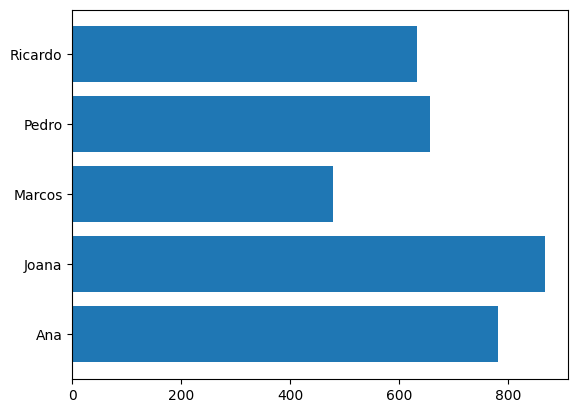

In [58]:
plt.barh(df_vendedor['vendedor'],df_vendedor['total_venda'])
plt.show()

#### Avançado

Junte o DataFrame de vendas com o de produtos (utilizando o campo
produto/nome_produto) para obter a categoria de cada venda.

In [59]:
vendas.head()

,id_venda,data,produto,unidade,preco_unitario,quantidade,vendedor,total_venda
0,1,2025-07-01,Camiseta,un,49.9,2,Joana,99.8
1,2,2025-07-01,Calça,un,89.9,1,Ricardo,89.9
2,3,2025-07-02,Tênis,par,159.0,1,Ana,159.0
3,4,2025-07-02,Bermuda,un,59.9,3,Joana,179.7
4,5,2025-07-03,Meia,par,14.9,5,Ricardo,74.5


In [60]:
produtos = pd.read_csv('produtos.csv.txt')
produtos.head()

,id_prod,nome_produto,categoria,estoque,preco
0,1,Notebook,Eletrônicos,10,2500.0
1,2,Café,Bebidas,200,16.5
2,3,Tênis,Esportes,50,159.0
3,4,Bermuda,Vestuário,18,59.9
4,5,Meia,Vestuário,250,14.9


In [61]:
vendas_produtos = vendas.merge(
    produtos[['nome_produto','categoria']],
    left_on='produto',
    right_on='nome_produto',
    how='left'    
)
vendas_produtos.drop('nome_produto', axis=1, inplace=True)
vendas_produtos.head()

,id_venda,data,produto,unidade,preco_unitario,quantidade,vendedor,total_venda,categoria
0,1,2025-07-01,Camiseta,un,49.9,2,Joana,99.8,Vestuário
1,2,2025-07-01,Calça,un,89.9,1,Ricardo,89.9,Vestuário
2,3,2025-07-02,Tênis,par,159.0,1,Ana,159.0,Esportes
3,4,2025-07-02,Bermuda,un,59.9,3,Joana,179.7,Vestuário
4,5,2025-07-03,Meia,par,14.9,5,Ricardo,74.5,Vestuário


Gere um relatório de vendas por categoria (quantidade, valor total).

In [62]:
categoria_venda = vendas_produtos.groupby('categoria')['total_venda'].sum().reset_index()
categoria_venda['quantidade_venda'] = vendas_produtos.groupby('categoria')['total_venda'].count().reset_index()['total_venda']
categoria_venda

,categoria,total_venda,quantidade_venda
0,Esportes,477.0,3
1,Vestuário,2942.4,27


Crie um gráfico da evolução diária das vendas totais (soma de total_venda por
data) utilizando um gráfico de linha.

In [66]:
vendas.head()

,id_venda,data,produto,unidade,preco_unitario,quantidade,vendedor,total_venda
0,1,2025-07-01,Camiseta,un,49.9,2,Joana,99.8
1,2,2025-07-01,Calça,un,89.9,1,Ricardo,89.9
2,3,2025-07-02,Tênis,par,159.0,1,Ana,159.0
3,4,2025-07-02,Bermuda,un,59.9,3,Joana,179.7
4,5,2025-07-03,Meia,par,14.9,5,Ricardo,74.5


In [68]:
vendas.info() #vendo se a data ta no formato certo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_venda        30 non-null     int64  
 1   data            30 non-null     object 
 2   produto         30 non-null     object 
 3   unidade         30 non-null     object 
 4   preco_unitario  30 non-null     float64
 5   quantidade      30 non-null     int64  
 6   vendedor        30 non-null     object 
 7   total_venda     30 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.0+ KB


In [70]:
vendas['data'] = pd.to_datetime(vendas['data'])
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venda        30 non-null     int64         
 1   data            30 non-null     datetime64[ns]
 2   produto         30 non-null     object        
 3   unidade         30 non-null     object        
 4   preco_unitario  30 non-null     float64       
 5   quantidade      30 non-null     int64         
 6   vendedor        30 non-null     object        
 7   total_venda     30 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.0+ KB


In [75]:
data_venda = vendas[['data','total_venda']]
data_venda

,data,total_venda
0,2025-07-01,99.8
1,2025-07-01,89.9
2,2025-07-02,159.0
3,2025-07-02,179.7
4,2025-07-03,74.5
5,2025-07-04,79.8
6,2025-07-05,199.0
7,2025-07-05,49.9
8,2025-07-06,129.9
9,2025-07-06,179.8


In [78]:
data_venda = data_venda.groupby('data')['total_venda'].sum().reset_index()
data_venda

,data,total_venda
0,2025-07-01,189.7
1,2025-07-02,338.7
2,2025-07-03,74.5
3,2025-07-04,79.8
4,2025-07-05,248.9
5,2025-07-06,309.7
6,2025-07-07,278.8
7,2025-07-08,44.7
8,2025-07-09,39.9
9,2025-07-10,199.0


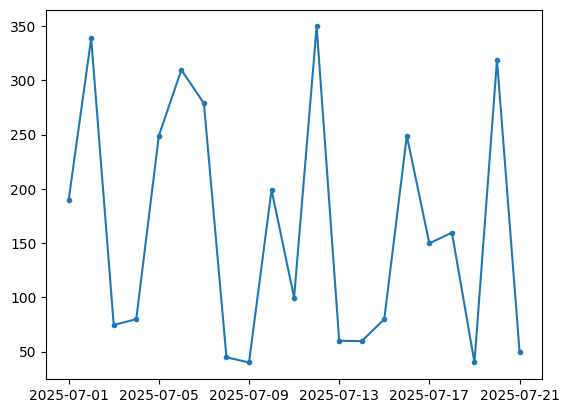

In [81]:
plt.plot(data_venda['data'],
         data_venda['total_venda'],'.-')
plt.show()

Identifique o produto mais rentável (maior soma de total_venda).

In [63]:
vendas.groupby('produto')['total_venda'].sum().reset_index().sort_values('total_venda',ascending=False).head(1)

,produto,total_venda
4,Jaqueta,597.0


Mostre, em um gráfico de setores (pizza), a participação de cada categoria no
valor total vendido.

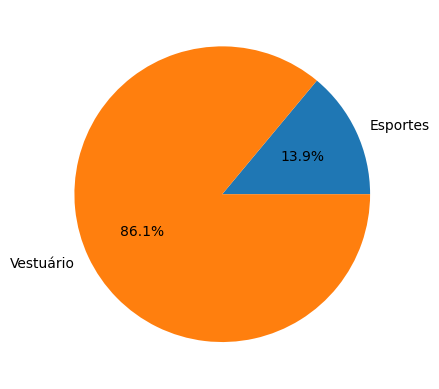

In [64]:
plt.pie(
    categoria_venda['total_venda'],
    labels= categoria_venda['categoria'],
    autopct='%1.1f%%',
    startangle= 0    
)

plt.show()